In [2]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [3]:
df = pd.read_csv('../data/external/train.csv')

In [4]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.split(' ').str[1].astype(float)

In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0


In [6]:
df.select_dtypes(include=['object']).columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Order_Date', 'Time_Ordered',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City'],
      dtype='object')

In [7]:
df.replace('NaN ', np.nan, inplace=True)

In [8]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Ordered                   1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

<Axes: >

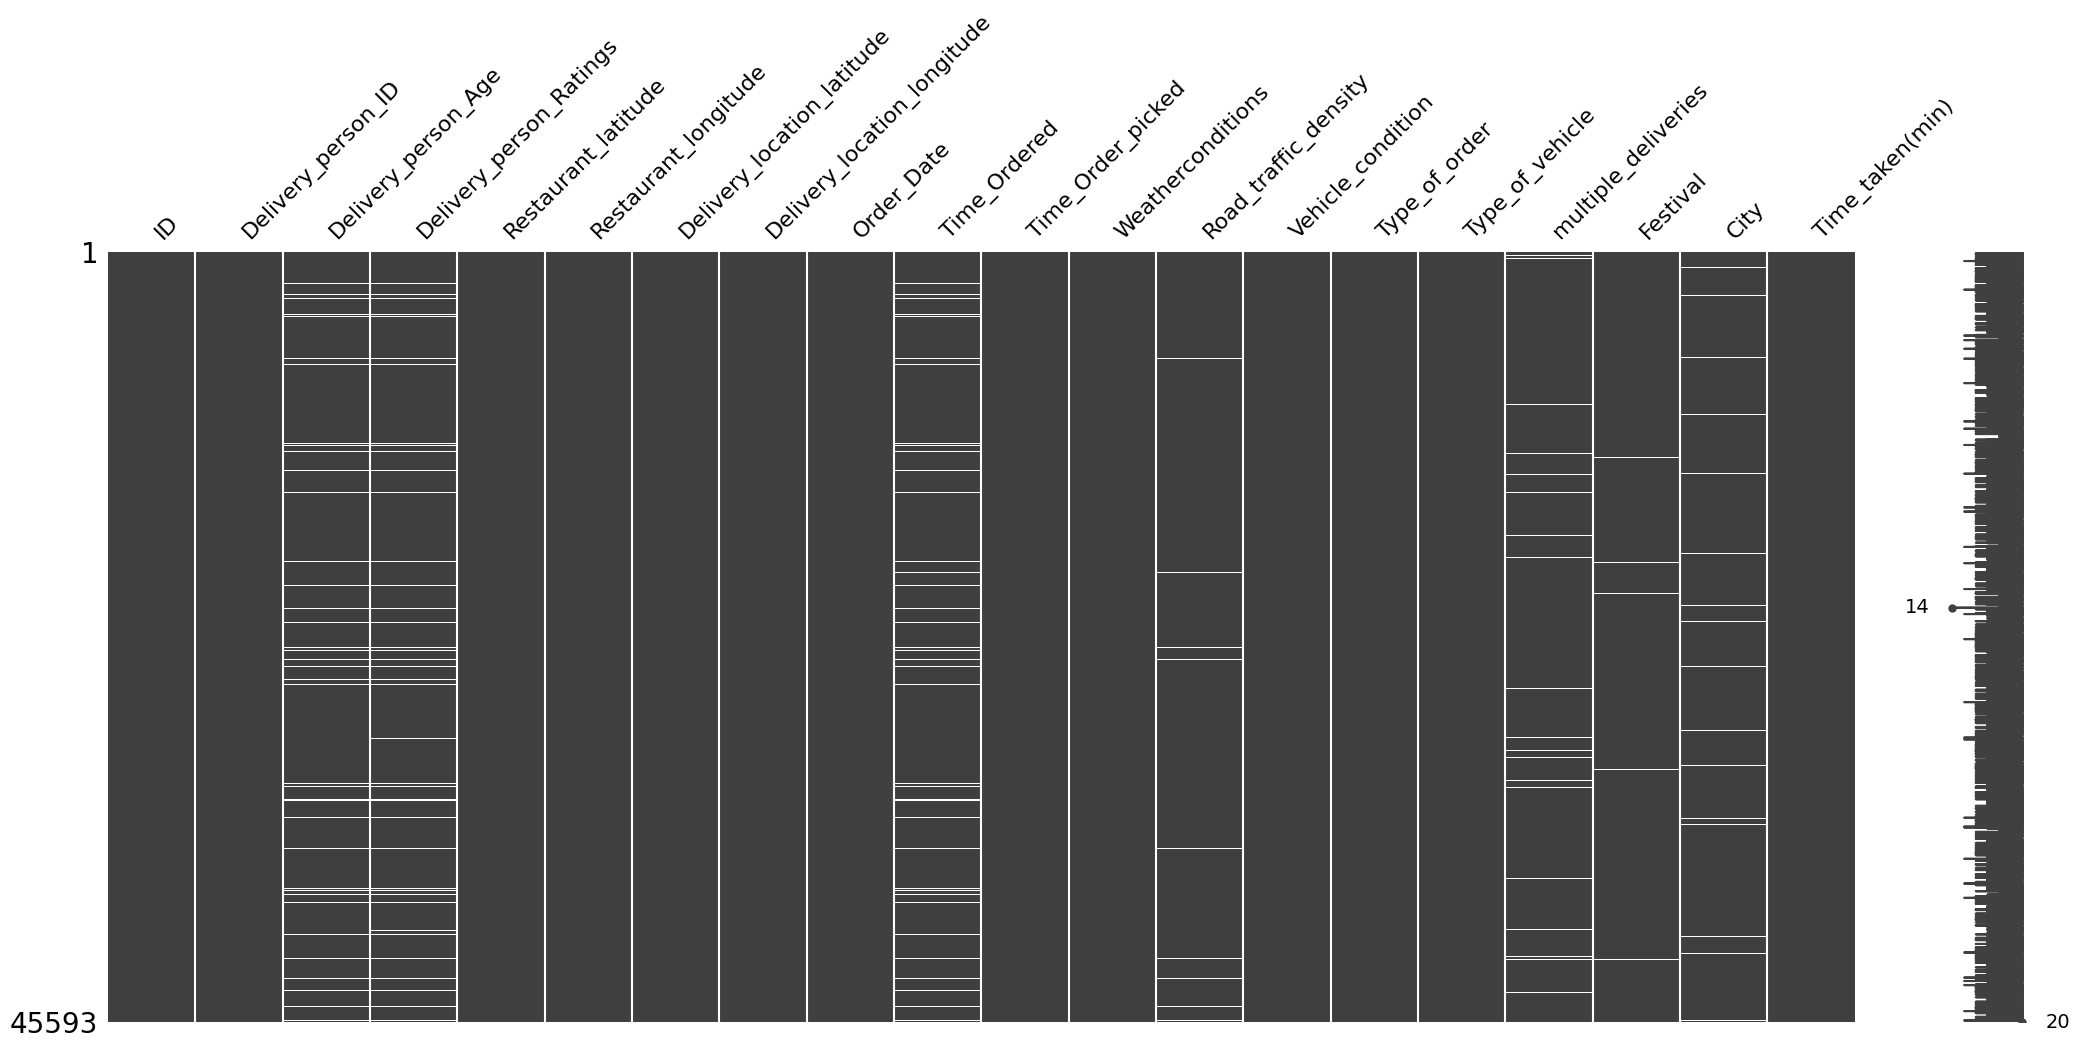

In [9]:
msno.matrix(df)

<Axes: >

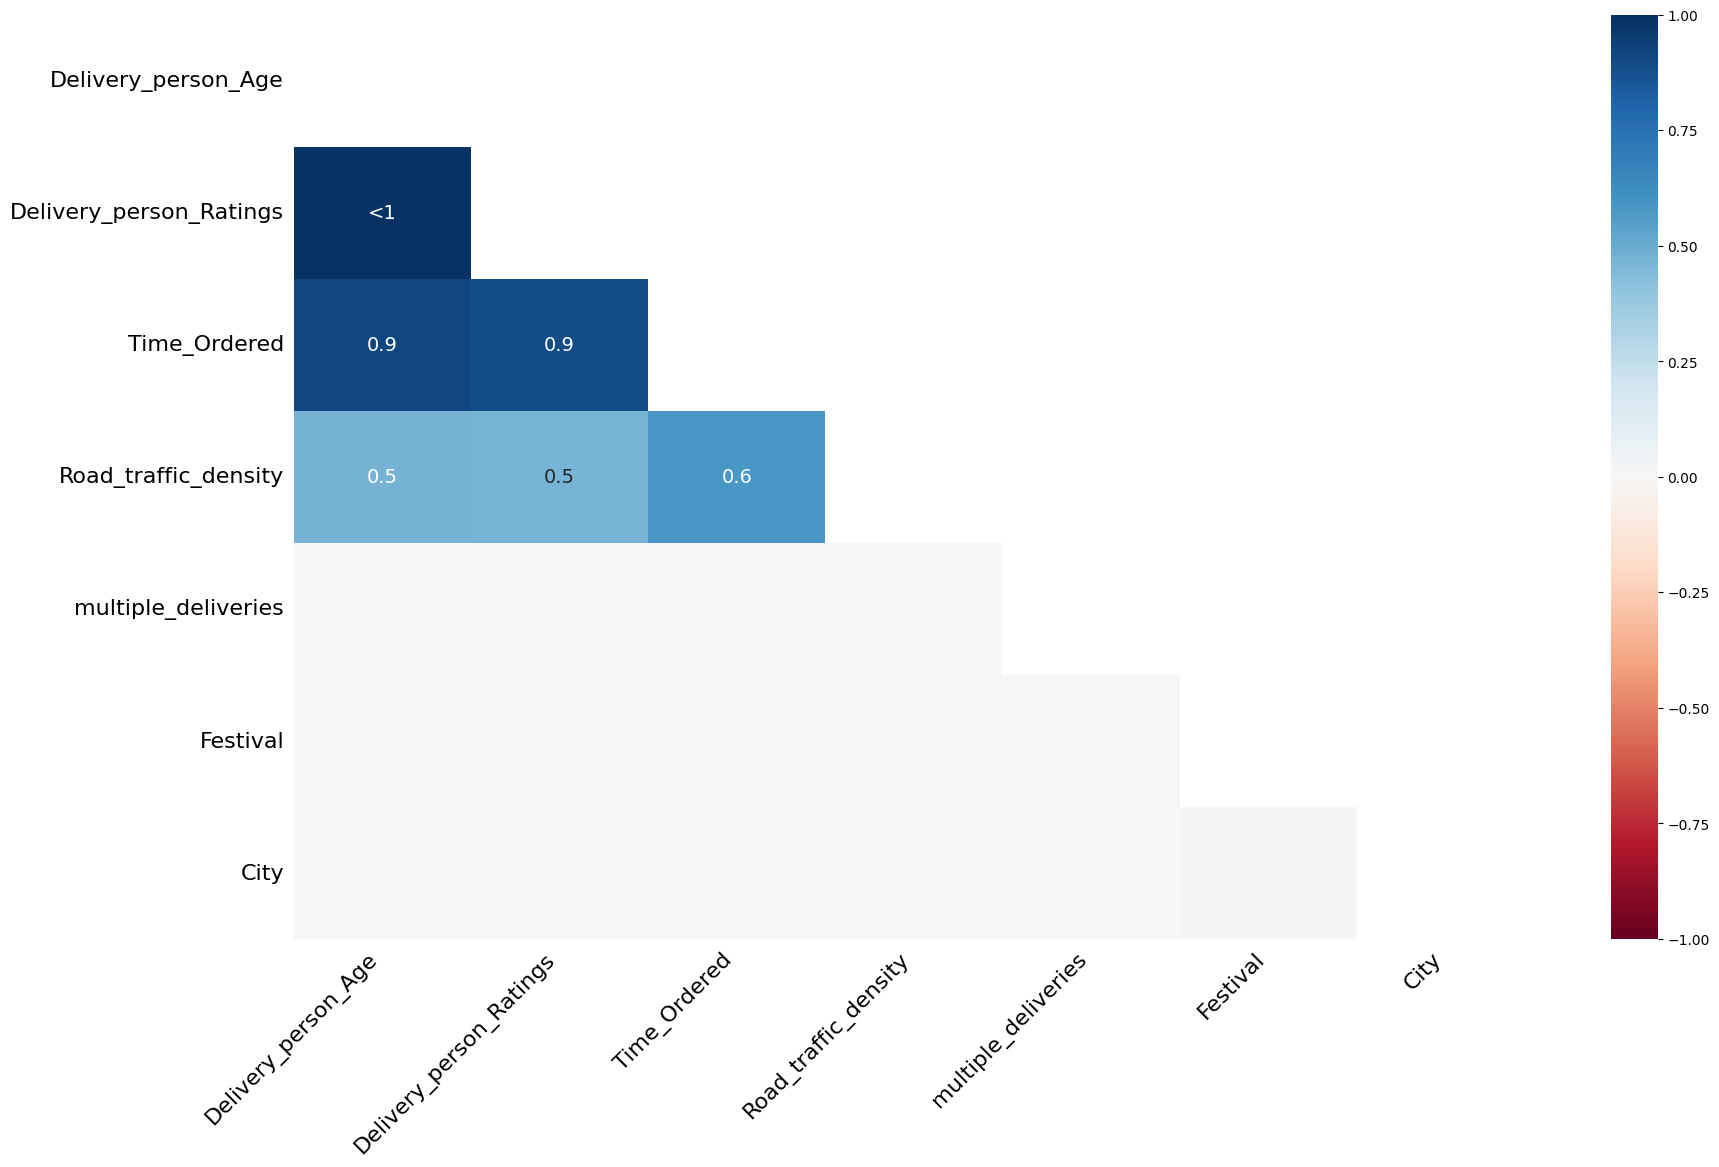

In [10]:
msno.heatmap(df)

<Axes: >

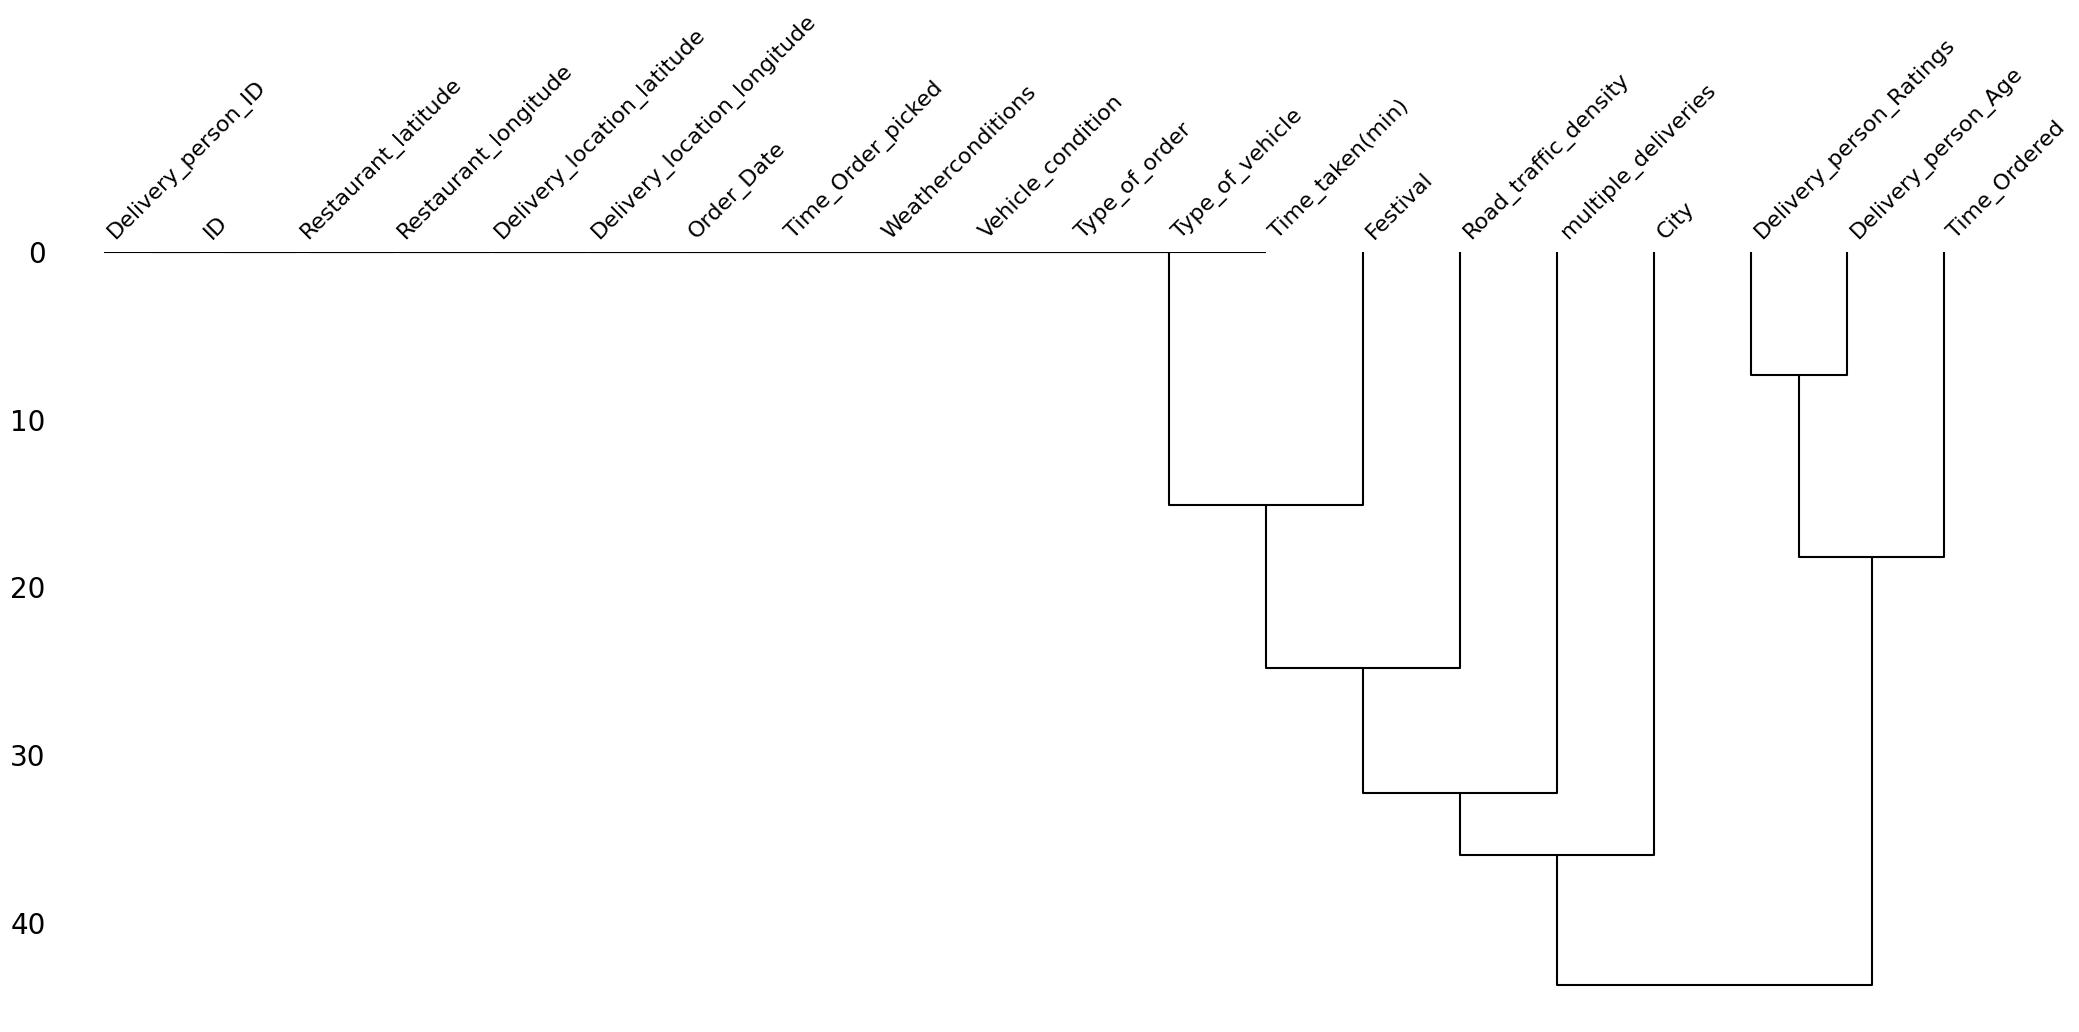

In [11]:
msno.dendrogram(df)

In [12]:
df['city_code'] = df['Delivery_person_ID'].str.split('RES', expand= True)[0]

In [13]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [16]:
profile.to_file("../assets/eda.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 132.23it/s]


In [18]:
df[['Delivery_person_Age', 'Vehicle_condition']]

,Delivery_person_Age,Vehicle_condition
0,37,2
1,34,2
2,23,0
3,38,0
4,32,1
...,...,...
45588,30,1
45589,21,0
45590,30,1
45591,20,0


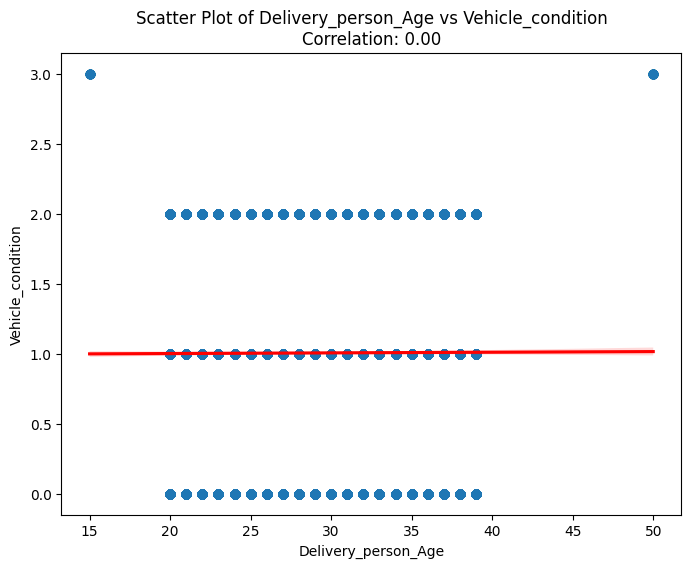

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (Replace with your own data)
# df = pd.read_csv("your_data.csv")

# Define columns
col_x = "Delivery_person_Age"  # Replace with your actual column name
col_y = "Vehicle_condition"  # Replace with your actual column name

# Calculate correlation
correlation = df[col_x].astype(float).corr(df[col_y].astype(float))

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df[col_x].astype(float), y=df[col_y].astype(float), scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add title and labels
plt.title(f'Scatter Plot of {col_x} vs {col_y}\nCorrelation: {correlation:.2f}')
plt.xlabel(col_x)
plt.ylabel(col_y)

# Show plot
plt.show()


In [22]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(float)
df['Delivery_person_Age'] = df['Vehicle_condition'].astype(float)

<Axes: title={'center': 'Scatter Plot of Delivery_person_Age vs Vehicle_condition'}, xlabel='Delivery_person_Age'>

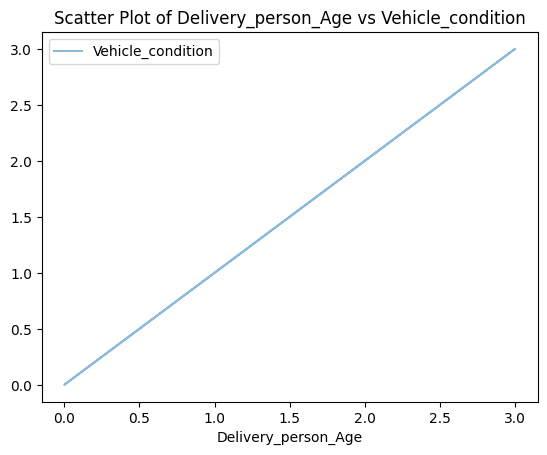

In [26]:
df.plot(x='Delivery_person_Age', y='Vehicle_condition', alpha=0.5, title='Scatter Plot of Delivery_person_Age vs Vehicle_condition')